Dimensionality reduction techniques are used to reduce the number of features or variables in a dataset while preserving as much of the important information as possible. 

Dimensionality reduction is typically employed in various scenarios where high-dimensional data poses challenges or inefficiencies. Here are some common situations when you might consider using dimensionality reduction techniques:

Visualization:

When you want to visualize high-dimensional data in a 2D or 3D space for exploratory data analysis.
Techniques like t-Distributed Stochastic Neighbor Embedding (t-SNE) and Principal Component Analysis (PCA) are commonly used for visualization.

Computational Efficiency:

In machine learning, training models on high-dimensional data can be computationally expensive and time-consuming.
Dimensionality reduction can speed up training times and reduce the memory footprint of models.

Curse of Dimensionality:

In high-dimensional spaces, the amount of data needed to generalize accurately increases exponentially, leading to sparsity issues.
Dimensionality reduction can mitigate the curse of dimensionality and improve model performance.

Noise Reduction:

High-dimensional data may contain noise or irrelevant features that can adversely impact model performance.
By reducing dimensionality, you can focus on the most informative features and potentially improve model robustness.

Feature Engineering:

When you have a large number of features and want to identify the most relevant ones for predictive modeling.
Dimensionality reduction methods can reveal the underlying structure of the data and highlight important features.

Collinearity:

In the presence of highly correlated features (collinearity), dimensionality reduction can help address multicollinearity issues.
Techniques like Principal Component Analysis (PCA) transform the features into uncorrelated principal components.

Interpretability:

Simplifying the dataset can make it easier to interpret and communicate results.
Reduced dimensionality often leads to more interpretable models and facilitates a better understanding of the data.

Memory Constraints:

In cases where the dataset is too large to fit into memory, dimensionality reduction can be used to reduce the data size.
This is particularly relevant for big data applications.

Preprocessing for Downstream Tasks:

As a preprocessing step before applying other machine learning algorithms.
Reducing dimensionality can improve the performance of algorithms that are sensitive to the curse of dimensionality.
It's important to note that dimensionality reduction should be applied thoughtfully and with consideration for the specific characteristics of your data and the goals of your analysis. While it can offer advantages, it may also introduce loss of information, and the choice of technique should be guided by the nature of the problem you are trying to solve.

Note: As I wrote these notebooks, this is where I began having compatibility issues with my packages; we will be importing keras and other high end packages. This is a good time to refresh how to uninstall, update, and install specific versions of packages in your environment. If you opted for the Anaconda installation, multiple environmnets can be customized in the Anaconda browser. Happy coding!

Here I compare dimensionality reduction using PCA, tSNE, and LDA. Dimensionality reduction helps simplify complex datasets.
PCA captures overall variability.
t-SNE focuses on preserving pairwise similarities.
LDA emphasizes class separability in a supervised manner.
The plots visually demonstrate how each technique transformed the original data into a more manageable form, making it easier to understand and potentially revealing important patterns in the data.

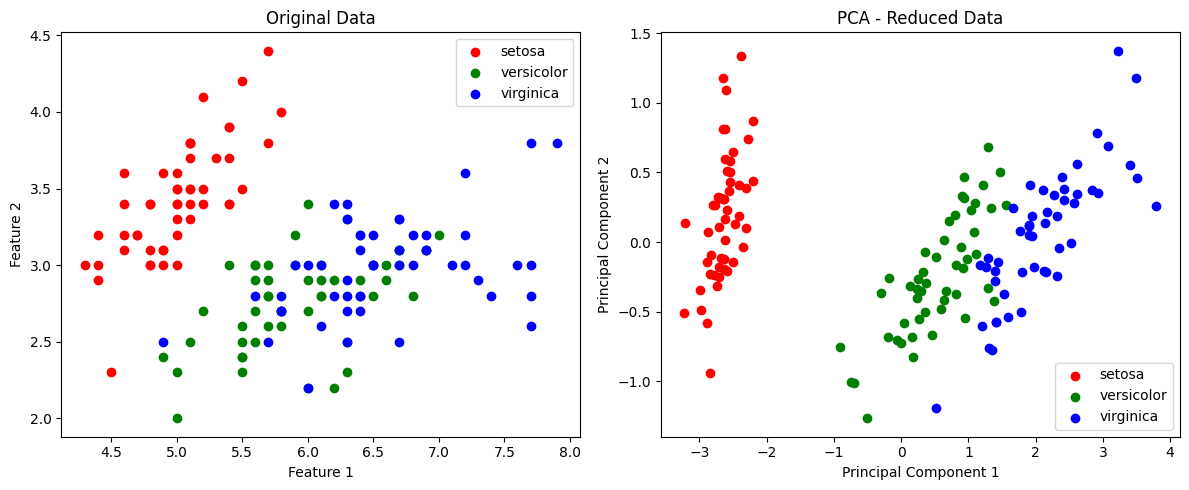

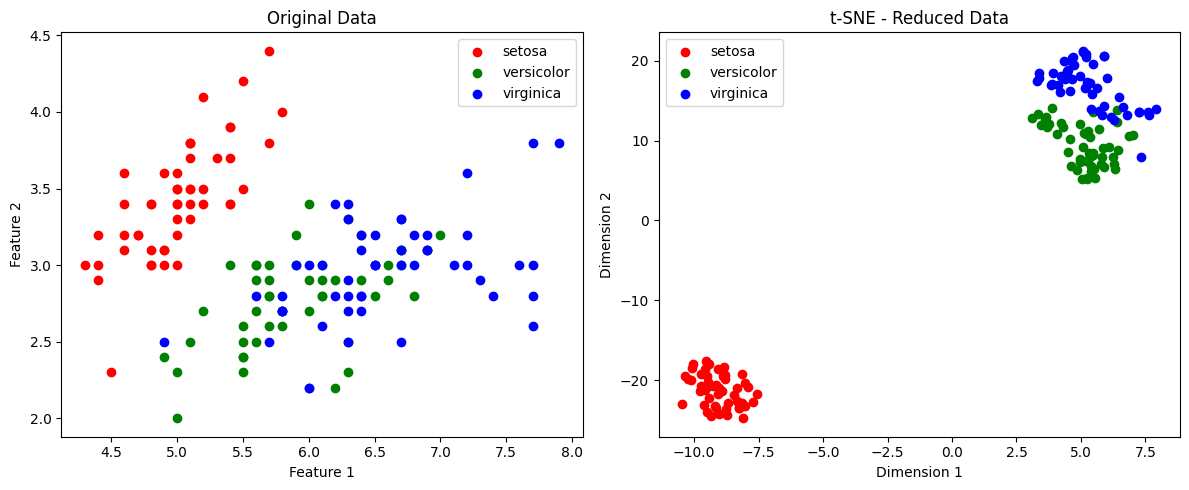

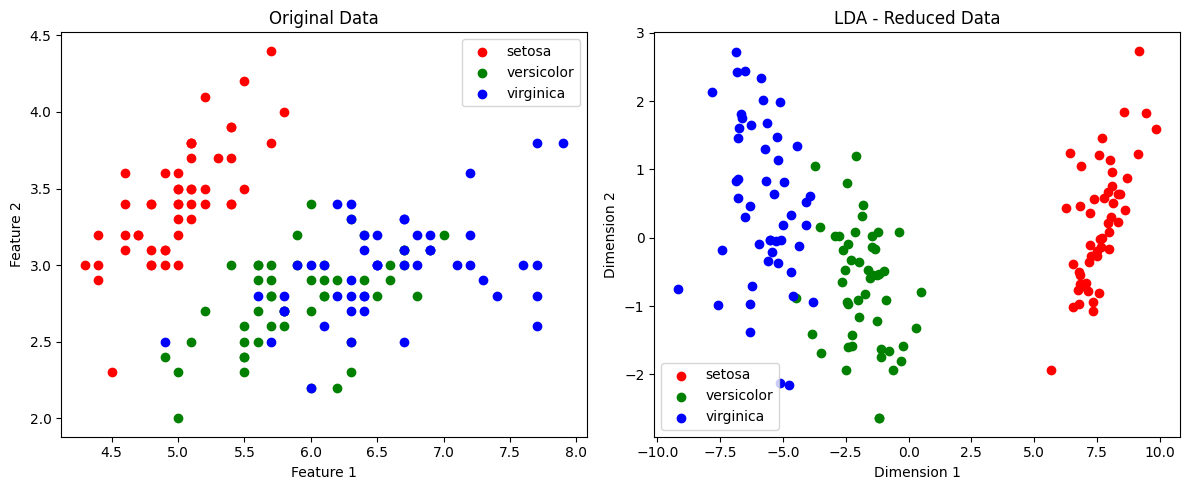

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Function to plot original and reduced data
def plot_reduction(X_original, X_reduced, title_original, title_reduced, target_names):
    plt.figure(figsize=(12, 5))

    # Plot original data
    plt.subplot(1, 2, 1)
    for i, c in zip(range(len(target_names)), ['red', 'green', 'blue']):
        plt.scatter(X_original[y == i, 0], X_original[y == i, 1], c=c, label=target_names[i])
    plt.title(title_original)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()

    # Plot reduced data
    plt.subplot(1, 2, 2)
    for i, c in zip(range(len(target_names)), ['red', 'green', 'blue']):
        plt.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1], c=c, label=target_names[i])
    plt.title(title_reduced)
    plt.xlabel('Principal Component 1' if 'PCA' in title_reduced else 'Dimension 1')
    plt.ylabel('Principal Component 2' if 'PCA' in title_reduced else 'Dimension 2')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plot_reduction(X, X_pca, 'Original Data', 'PCA - Reduced Data', target_names)

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)
plot_reduction(X, X_tsne, 'Original Data', 't-SNE - Reduced Data', target_names)

# Perform LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)
plot_reduction(X, X_lda, 'Original Data', 'LDA - Reduced Data', target_names)

You may be wondering how this is relevent, and why it is so confusing. 

We are at the point where the math behind this is beyond the scope of this document. The take-away here is the we can obtain "principle components" which are the most valuable for account for variance. These PCs can be used in a variety of ways.

GPT: "Describe a pipeline where dimension reduction would be necessary"

A common scenario where a pipeline with dimensionality reduction is necessary is in machine learning tasks involving high-dimensional datasets. Here's a step-by-step description of such a pipeline:

Objective: The goal is to build a predictive model for a target variable using a dataset with a large number of features.

Data Collection:

Collect a dataset with a large number of features. This could be common in fields like genomics, image processing, natural language processing, or sensor data.
Data Preprocessing:

Handle missing values, outliers, and any other data preprocessing steps.
Feature Scaling:

Standardize or normalize the features to ensure that they are on similar scales. This is often important for algorithms sensitive to the scale of the input features.
Dimensionality Reduction:

Apply dimensionality reduction techniques like Principal Component Analysis (PCA) to reduce the number of features.
The high dimensionality may lead to computational inefficiency, increased risk of overfitting, and challenges in visualizing and interpreting the data.

Train/Test Split:

Split the dataset into training and testing sets.
Model Training:

Train machine learning models on the reduced-dimensionality training data.
The reduced-dimensionality data is computationally more efficient to work with and may improve the generalization performance of the models.

Model Evaluation:

Evaluate the model's performance on the testing set.
Results Analysis:

If necessary, interpret the results and make decisions based on the model's output.
If using PCA, analyze the importance of principal components in explaining the variance in the data.

Optional: Hyperparameter Tuning and Model Refinement:

If needed, perform hyperparameter tuning or refine the model based on the evaluation results.
Final Model:

Deploy the final model for making predictions on new, unseen data.
This pipeline is particularly useful when dealing with datasets where the number of features is large compared to the number of samples, and when computational efficiency, interpretability, or overfitting concerns are prominent. Dimensionality reduction can help create a more manageable and informative representation of the data for downstream analysis.

The goal so far is that you understand dimensionality reduction allows us to identify important attributes in the data. Next notebook, we will dive into classification, but here is an introduction. The goal here is to identify attributes of the data that allow us to make decisions about whether the datum fits into one catagory or another. 

GPT: "Provide python code for a pipeline where dimension reduction would be necessary "

Accuracy: 0.93


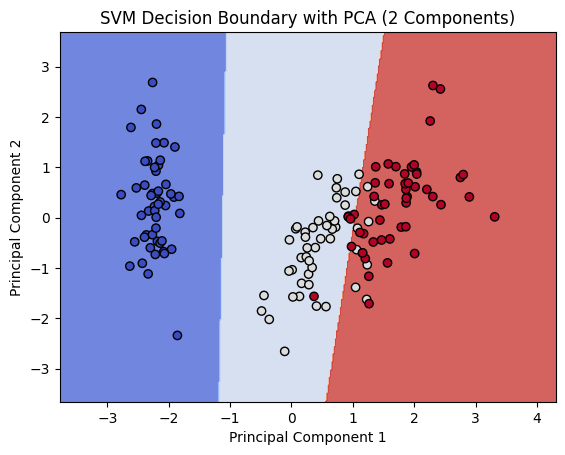

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Step 1: Data Preprocessing
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Dimensionality Reduction (PCA)
# Reduce to 2 principal components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 3: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Step 4: Model Training
# Using a simple SVM classifier
svm_classifier = SVC(kernel='linear', C=1)
svm_classifier.fit(X_train, y_train)

# Step 5: Model Evaluation
# Predict on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Step 6: Visualization
# Plot the decision boundary
h = .02  # Step size in the mesh
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])

# Plot the decision boundary
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot the points
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', marker='o')
plt.title('SVM Decision Boundary with PCA (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()


Now for a prediction task.

Fit Indices for Original Dataset:
R-squared: 0.94
Mean Squared Error: 0.04

Fit Indices for Reduced-Dimensionality Dataset (PCA):
R-squared: 0.91
Mean Squared Error: 0.07


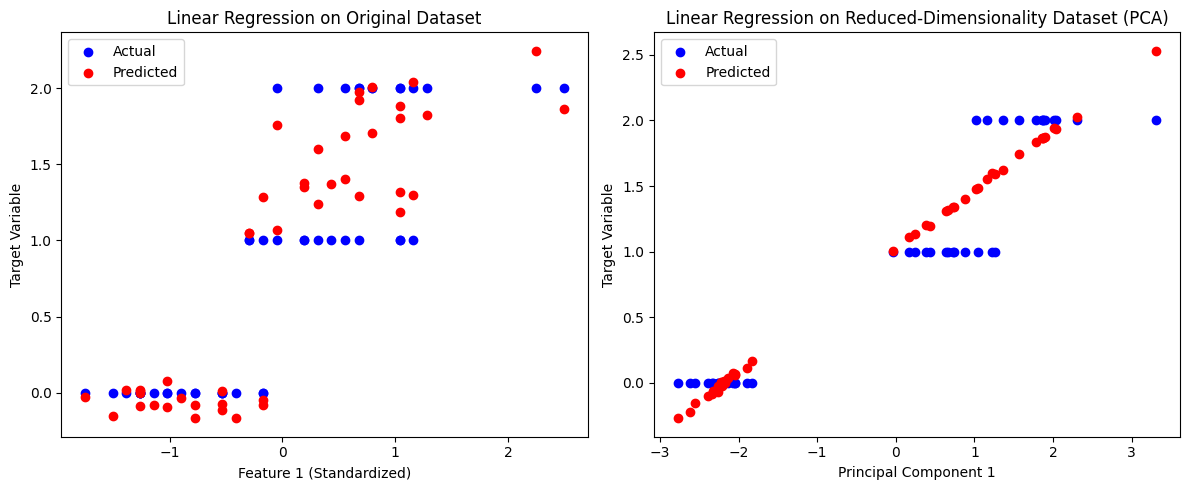

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Step 1: Data Preprocessing
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: PCA for Dimensionality Reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 3: Train/Test Split for Original Dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Step 4: Train Linear Regression on Original Dataset
regression_model_original = LinearRegression()
regression_model_original.fit(X_train, y_train)

# Step 5: Predict and Evaluate on Original Dataset
y_pred_original = regression_model_original.predict(X_test)
r2_original = r2_score(y_test, y_pred_original)
mse_original = mean_squared_error(y_test, y_pred_original)

# Step 6: Train Linear Regression on Reduced-Dimensionality Dataset
X_train_pca, X_test_pca, _, _ = train_test_split(X_pca, y, test_size=0.3, random_state=42)
regression_model_pca = LinearRegression()
regression_model_pca.fit(X_train_pca, y_train)

# Step 7: Predict and Evaluate on Reduced-Dimensionality Dataset
y_pred_pca = regression_model_pca.predict(X_test_pca)
r2_pca = r2_score(y_test, y_pred_pca)
mse_pca = mean_squared_error(y_test, y_pred_pca)

# Step 8: Comparison of Fit Indices
print("Fit Indices for Original Dataset:")
print(f"R-squared: {r2_original:.2f}")
print(f"Mean Squared Error: {mse_original:.2f}\n")

print("Fit Indices for Reduced-Dimensionality Dataset (PCA):")
print(f"R-squared: {r2_pca:.2f}")
print(f"Mean Squared Error: {mse_pca:.2f}")

# Step 9: Visualization
plt.figure(figsize=(12, 5))

# Scatter plot for the original dataset
plt.subplot(1, 2, 1)
plt.scatter(X_test[:, 0], y_test, color='blue', label='Actual')
plt.scatter(X_test[:, 0], y_pred_original, color='red', label='Predicted')
plt.title('Linear Regression on Original Dataset')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Target Variable')
plt.legend()

# Scatter plot for the reduced-dimensionality dataset
plt.subplot(1, 2, 2)
plt.scatter(X_test_pca[:, 0], y_test, color='blue', label='Actual')
plt.scatter(X_test_pca[:, 0], y_pred_pca, color='red', label='Predicted')
plt.title('Linear Regression on Reduced-Dimensionality Dataset (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Target Variable')
plt.legend()

plt.tight_layout()
plt.show()


Here we find that the PCA data actually performed worse, perhaps because this data is not complex enough. You can test this hypothesis by bringing in your own data. The take-away here is the workflow. 

Autoencoders are neural network architectures used for unsupervised learning that aim to learn efficient representations of input data. Here's a basic example of how you could implement an autoencoder using a simple neural network for the Iris dataset in Python, leveraging the Keras library:

In [9]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Model
from keras.layers import Input, Dense

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Step 1: Data Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 3: Build Autoencoder Model
input_layer = Input(shape=(X_train.shape[1],))
encoded = Dense(2, activation='relu')(input_layer)  # 2 neurons in the encoded layer
decoded = Dense(X_train.shape[1], activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Step 4: Train Autoencoder
autoencoder.fit(X_train, X_train, epochs=100, batch_size=16, shuffle=True, validation_data=(X_test, X_test))

# Step 5: Encode and Decode Data
encoded_data = autoencoder.predict(X_scaled)

# Print the encoded representation for the first few samples
print("Encoded Data:")
print(encoded_data[:5, :])

# Note: In practice, you might visualize the encoded representation or use it for downstream tasks.

AttributeError: module 'numpy' has no attribute 'typeDict'